#HIDS-506 Final Project: 

## Packages



We will start by loading some of the packages that will help us 
organize and visualize the data. Other packages will be loaded as necessary.

In [ ]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib 
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

## Dataset

**Research Question:** Can machine learning (ML) provide a data-driven alternative to current emergency care triage and produce an accurate patient acuity score based on minimal patient information upon admission to the Emergency Department (ED), thus reducing human-biased medical decisions and preserving clinician time, attention, and ED workflow? 

Note: This notebook was used primarily for splitting X_df (resampled) and y_df (resampled) into training and test splits. I explored fitting the model using feature importance algorithms and a neural network. These models were not considered in the final analysis. 


Exploring the datasets:

In [ ]:
#from google.colab import 
#drivedrive.mount('/content/drive')

In [ ]:
#mounting google drive to access files 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Triage_clean_df

In [ ]:
# triage clean file includes cleaned dataframe with all merged features from MIMIC-IV
# defining triage_clean_file path 
X_df = '/content/drive/MyDrive/HIDS_506_FinalProject/data/df_merged_resampled.csv'
y_df = '/content/drive/MyDrive/HIDS_506_FinalProject/data/y_df2_resampled.csv'
# read in triage_clean_file to dataframe
X_df = pd.read_csv(X_df)
y_df = pd.read_csv(y_df)

In [ ]:
# shape of X_df and y_df
print(X_df.shape)
print(y_df.shape)

(59241, 4499)
(59241, 5)


In [ ]:
# defining X_df and y_df to training varaibles for splitting
X_train_df = X_df
y_train_df = y_df

In [ ]:
# drop intime and outtime due to complexity and low feature importance 
X_train_df = X_train_df.drop(columns=['intime', 'outtime'])

In [ ]:
# using a 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=42)

In [ ]:
# visualizing the shape of our split test and train variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47392, 4497), (11849, 4497), (47392, 5), (11849, 5))

In [ ]:
# showing the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 47392 samples.
Testing set has 11849 samples.


In [ ]:
# getting the count of y_train and y_test sets 
Counter(y_train), Counter(y_test)

(Counter({'1': 1, '2': 1, '3': 1, '4': 1, '5': 1}),
 Counter({'1': 1, '2': 1, '3': 1, '4': 1, '5': 1}))

In [ ]:
# saving split data sets to csv files 
X_train.to_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/X_train_resampled.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/X_test_resampled.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/y_train_resampled.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/HIDS_506_FinalProject/data/y_test_resampled.csv', index=False)

In [ ]:
# imports for random forest classifier for feature importance
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# X is your input feature matrix with shape (n_samples, n_features)
# y is your target variable matrix with shape (n_samples, n_classes)
# where each column corresponds to a binary label for a class

# Train a random forest classifier on your data
model = RandomForestClassifier(n_estimators=100) #, random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the random forest classifier
importances = model.feature_importances_

# Print feature importances
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")


Feature 0: 0.06479884074826989
Feature 1: 0.06156122791569392
Feature 2: 0.08871742772756648
Feature 3: 0.04653843140853694
Feature 4: 0.04611447799838928
Feature 5: 0.07588567492235565
Feature 6: 0.06493403744331201
Feature 7: 0.040402420838896905
Feature 8: 0.013505673080270156
Feature 9: 0.01108032041174485
Feature 10: 0.0003429283712011098
Feature 11: 0.0024064222494973517
Feature 12: 0.00893398476929955
Feature 13: 0.005077462538467503
Feature 14: 0.0001885593893053521
Feature 15: 0.0032666193899948755
Feature 16: 0.0006399072660184163
Feature 17: 0.0003338284163076742
Feature 18: 0.01005325978112819
Feature 19: 0.007668045536019087
Feature 20: 0.00012524817002709581
Feature 21: 0.000407236361661916
Feature 22: 0.002294563325113509
Feature 23: 0.007352580909815717
Feature 24: 0.013071937246290388
Feature 25: 0.002865953430837018
Feature 26: 6.567360780295519e-05
Feature 27: 0.01002914915970688
Feature 28: 0.000960124483756464
Feature 29: 0.002489455319869127
Feature 30: 0.00076510

In [ ]:
# xgboost import for feature importance 
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# fit model no training data
# Replace invalid characters in feature names
new_feature_names = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in X_train.columns]

# Create a new dataframe with renamed columns
X_train_renamed = X_train.rename(columns=dict(zip(X_train.columns, new_feature_names)))

# Train the XGBClassifier model with the renamed feature names
model = XGBClassifier()
model.fit(X_train_renamed, y_train)

In [ ]:
# plot feature importance
fig, ax = plt.subplots(figsize=(100, 100))
plot_importance(model, ax=ax)
plt.show()
plt.savefig("feature_importance3.pdf", bbox_inches='tight')
# intial vital signs, gender, age, race, and cheif complaint of experiencing chets pain show the highest feature importance when fitting the model

In [ ]:
def get_predictions(predictions_proba, threshold=0.5):
  predictions = np.where(predictions_proba <= threshold, 0, 1)
  return predictions

#Function that calculates and print metrics
def show_metrics(testy, predictions):
  print('====================')
  accuracy = accuracy_score(testy, predictions)
  print('Accuracy: %.3f' % accuracy)
  recall = recall_score(testy, predictions)
  print('Recall: %.3f' % recall)
  precision = precision_score(testy, predictions)
  print('Precision: %.3f' % precision)
  f1 = f1_score(testy, predictions)
  print('F1: %.3f' % f1)
  print('====================')

#Function to plot ROC Curve
def plot_roc(testy, predictions, title):
    fpr, tpr, thresholds = roc_curve(testy, predictions)
    roc_auc = auc(fpr, tpr)  
    print('AUROC: %.3f' % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot PR Curve
def plot_prc(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    auc_score = auc(recall, precision)    
    plt.plot(recall,precision, label='PR curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--' )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.02])
    plt.ylim([0, 1.02])    
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot precision and recall vs all tresholds
def plot_prec_recall_vs_thresh(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    plt.plot(thresholds, precision[:-1], 'b--', label='precision')
    plt.plot(thresholds, recall[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')    
    plt.ylim([0,1])
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show()

In [ ]:
# scaler to fit model 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [ ]:
# Now apply the transformations to the data:

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# import keras for neural network testing
import keras
import tensorflow as tf
import datetime, os
from keras.callbacks import TensorBoard

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [ ]:
X_train.shape

(40000, 4459)

In [ ]:
# defining neural network 
model = Sequential()
# Dense(64) is a fully-connected layer with 64 units
# specify input shape 
model.add(Dense(64, activation='relu', input_shape=(4459,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# compiling nueral network architecture 
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [ ]:
# running model fitting with epochs size 100 and batch size 140
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_train, y_train), batch_size=140)

Epoch 1/100
286/286 [==============================] - 9s 18ms/step - loss: 1.0582 - accuracy: 0.5936 - val_loss: 0.8314 - val_accuracy: 0.6680
Epoch 2/100
286/286 [==============================] - 2s 6ms/step - loss: 0.8486 - accuracy: 0.6702 - val_loss: 0.7213 - val_accuracy: 0.7165
Epoch 3/100
286/286 [==============================] - 3s 9ms/step - loss: 0.7772 - accuracy: 0.6956 - val_loss: 0.6751 - val_accuracy: 0.7311
Epoch 4/100
286/286 [==============================] - 2s 8ms/step - loss: 0.7332 - accuracy: 0.7108 - val_loss: 0.6497 - val_accuracy: 0.7330
Epoch 5/100
286/286 [==============================] - 2s 6ms/step - loss: 0.7177 - accuracy: 0.7155 - val_loss: 0.6338 - val_accuracy: 0.7430
Epoch 6/100
286/286 [==============================] - 2s 8ms/step - loss: 0.6963 - accuracy: 0.7220 - val_loss: 0.6152 - val_accuracy: 0.7477
Epoch 7/100
286/286 [==============================] - 2s 8ms/step - loss: 0.6822 - accuracy: 0.7261 - val_loss: 0.6019 - val_accuracy: 0.751

In [ ]:
# model evaluation metrics
score = model.evaluate(X_test, y_test, batch_size=140)

72/72 [==============================] - 0s 3ms/step - loss: 0.8308 - accuracy: 0.7292


In [ ]:

model.metrics_names

['loss', 'accuracy']

In [ ]:
# printing model evaluation metrics (loss, accuracy)
score

[0.8308425545692444, 0.729200005531311]

In [ ]:
# plotting training and validation accuracy and loss overtime 
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

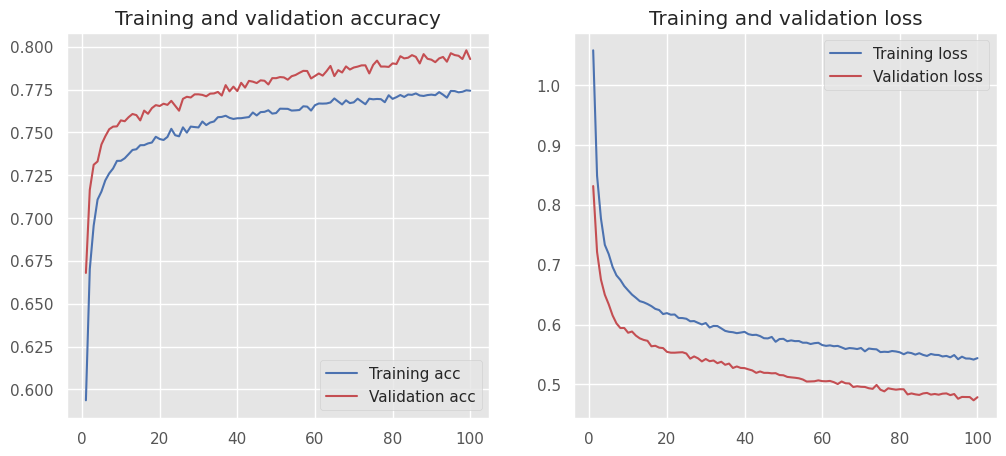

In [ ]:
# plot of histpry of training and validation loss and accuracy
plot_history(history)
plt.savefig('plot_part3.pdf')

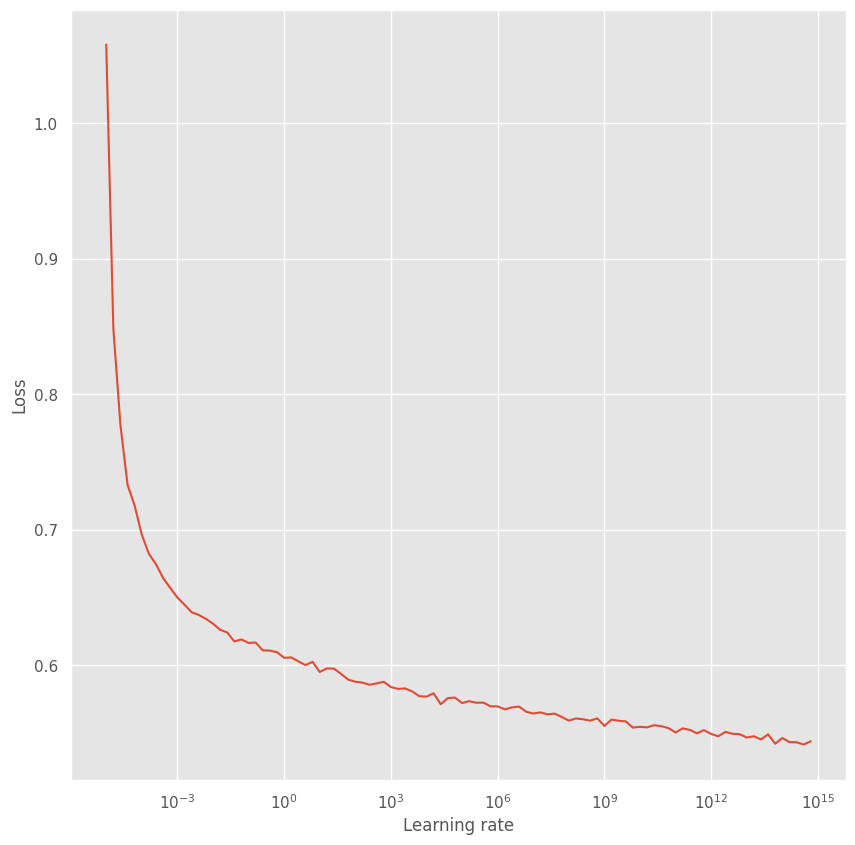

In [ ]:
# exploring the loss rate 
lrs = 1e-5 * (10 ** (np.arange(100)/5))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.show()


In [ ]:
# predictions of model on train data 
model.predict(X_train, batch_size=None, verbose=0, steps=None)

array([[6.1393325e-04, 5.0176805e-01, 4.9761686e-01, 1.1589307e-06,
        3.4487810e-09],
       [1.7043258e-05, 8.4974505e-02, 9.1500503e-01, 3.3390263e-06,
        4.9070531e-10],
       [1.0466313e-02, 2.5062358e-01, 7.0087677e-01, 3.7378039e-02,
        6.5533188e-04],
       ...,
       [4.8732653e-09, 9.9951375e-01, 4.8627489e-04, 6.7513872e-19,
        1.0563660e-22],
       [2.7601460e-03, 1.6611701e-01, 8.0422068e-01, 2.6703212e-02,
        1.9893718e-04],
       [8.2475255e-04, 1.2324568e-01, 8.5685158e-01, 1.9028068e-02,
        4.9904313e-05]], dtype=float32)

In [ ]:
# class 2 has the highest probablity for the first sample of X_train
np.argmax(model.predict(X_train)[0])

1250/1250 [==============================] - 3s 2ms/step


1

In [ ]:
%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
%tensorboard --logdir logs

In [ ]:
# Predicting the Test set results
y_pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred_prob[:5]

array([[1.9546775e-05, 7.7550195e-04, 6.6335082e-01, 3.2908583e-01,
        6.7683039e-03],
       [6.2021874e-03, 1.1138710e-01, 8.3586133e-01, 4.5872595e-02,
        6.7682390e-04],
       [5.0234022e-03, 6.3968349e-01, 3.5515302e-01, 1.3675971e-04,
        3.3023132e-06],
       [2.9903746e-03, 1.0968320e-01, 8.3081216e-01, 5.5991855e-02,
        5.2243553e-04],
       [1.0872990e-02, 7.0050156e-01, 2.8751531e-01, 1.0668748e-03,
        4.3198728e-05]], dtype=float32)

In [ ]:
# defining y_pred on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[:5]

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]], dtype=int32)

In [ ]:
# imports for multi-class classification metrics 
from sklearn.metrics import multilabel_confusion_matrix, classification_report
matrix = multilabel_confusion_matrix(y_pred, y_test)

<ipython-input-48-6c8ba11d461d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 2, i+1)


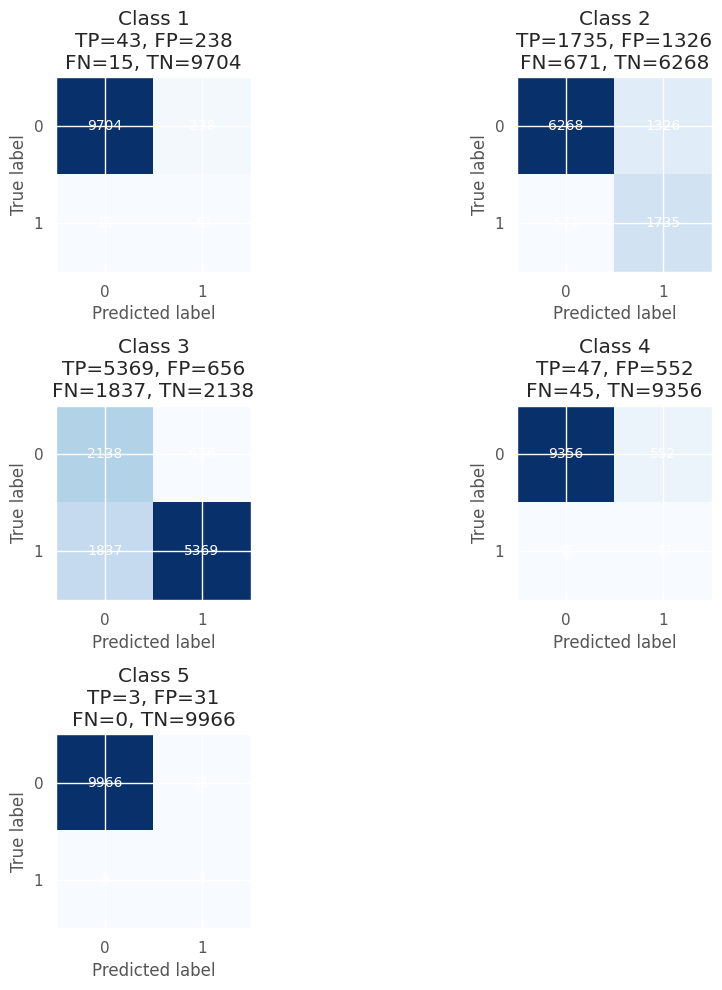

In [ ]:
# plot of confusion matrix for multi-class classification
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(matrix)):
    tn, fp, fn, tp = matrix[i].ravel()
    ax = plt.subplot(3, 2, i+1)
    ax.imshow(matrix[i], cmap='Blues')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'Class {i+1}\nTP={tp}, FP={fp}\nFN={fn}, TN={tn}')
    for j in range(2):
        for k in range(2):
            ax.text(k, j, matrix[i][j][k], ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

In [ ]:
# classification report of precision, recall, and f-1 score for model prediction on test data 
print(classification_report(
    y_test,
    y_pred,
    output_dict=False,
    target_names=['1', '2', '3', '4', '5']
))

              precision    recall  f1-score   support

           1       0.74      0.15      0.25       281
           2       0.72      0.57      0.63      3061
           3       0.75      0.89      0.81      6025
           4       0.51      0.08      0.14       599
           5       1.00      0.09      0.16        34

   micro avg       0.74      0.72      0.73     10000
   macro avg       0.74      0.36      0.40     10000
weighted avg       0.72      0.72      0.70     10000
 samples avg       0.72      0.72      0.72     10000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# save the model for future reference 
model.save('part3_model.h5')

In [ ]:
# find false negatives and why for project - analysis 
#fns, fps = [], []
#for i in range(len(y_test)):
  #if y_pred[i] == 0 and y_test[i] == 1:
    #fns.append(i)
  #if y_pred[i] == 1 and y_test[i] == 0:
    #fps.append(i)